In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
df.shape 

(6500, 20)

In [3]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [4]:
df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [5]:
df.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [6]:
df.dtypes

Customer Id               object
Artist Name               object
Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price Of Sculpture       float64
Base Shipping Price      float64
International             object
Express Shipment          object
Installation Included     object
Transport                 object
Fragile                   object
Customer Information      object
Remote Location           object
Scheduled Date            object
Delivery Date             object
Customer Location         object
Cost                     float64
dtype: object

In [4]:
df['Scheduled Date']= pd.to_datetime(df['Scheduled Date'])

In [5]:
df['Delivery Date']= pd.to_datetime(df['Delivery Date'])

In [9]:
 len(pd.unique(df['Artist Name']))

6449

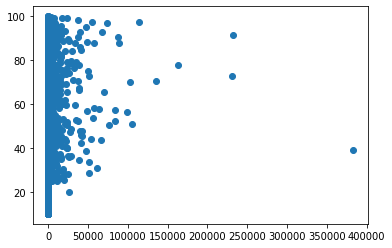

In [10]:
plt.scatter(df['Price Of Sculpture'], df['Base Shipping Price'])

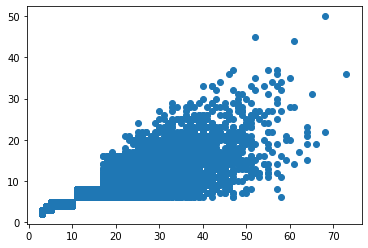

In [11]:
plt.scatter(df['Height'], df['Width'])

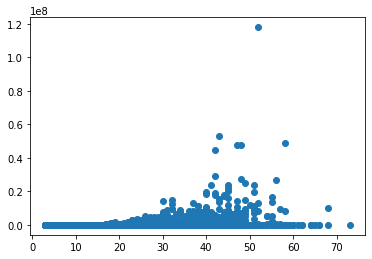

In [12]:
plt.scatter(df['Height'], df['Weight'])

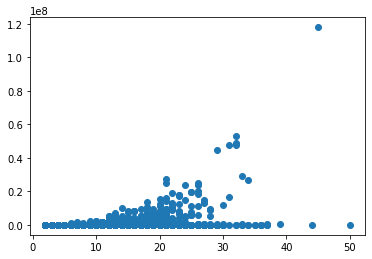

In [13]:
plt.scatter(df['Width'], df['Weight'])

<AxesSubplot:ylabel='Frequency'>

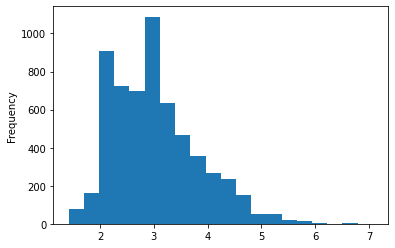

In [14]:
df['Width'].apply(np.sqrt).plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

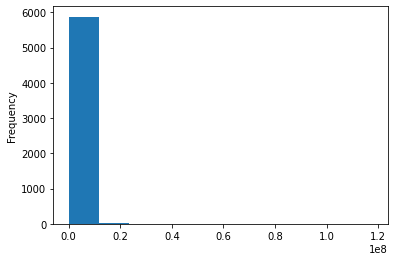

In [15]:
df['Weight'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

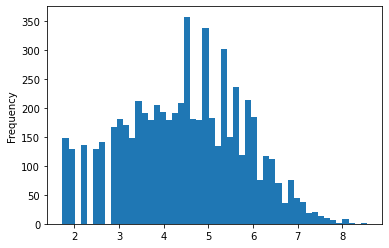

In [16]:
df['Height'].apply(np.sqrt).plot.hist(bins=50)

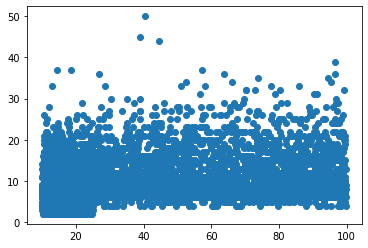

In [21]:
plt.scatter(df['Base Shipping Price'], df['Width'])

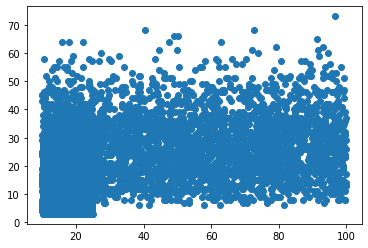

In [20]:
plt.scatter(df['Base Shipping Price'], df['Height'])

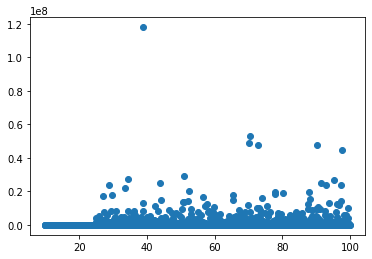

In [18]:
plt.scatter(df['Base Shipping Price'], df['Weight'])

In [19]:
df['International'].value_counts()

No     4294
Yes    2206
Name: International, dtype: int64

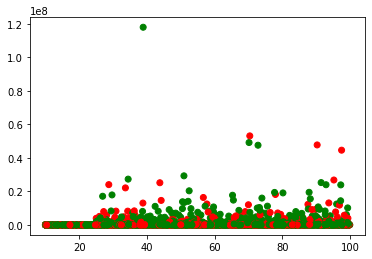

In [20]:
fig,ax=plt.subplots()
colors={'Yes':'red','No':'green'}
ax.scatter(df['Base Shipping Price'],df['Weight'],c=df['International'].apply(lambda x:colors[x]))
plt.show()

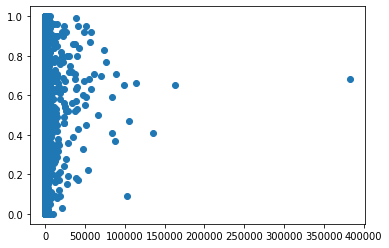

In [21]:
plt.scatter(df['Price Of Sculpture'], df['Artist Reputation'])

In [10]:
x=df[df['Price Of Sculpture']<350000]

In [26]:
x.shape

(6499, 20)

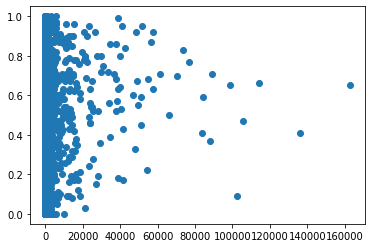

In [27]:
plt.scatter(x['Price Of Sculpture'], x['Artist Reputation'])

In [28]:
df.pivot_table(values='Artist Reputation',index='International',aggfunc='mean')

,Artist Reputation
International,
No,0.464640
Yes,0.456371


In [29]:
df.pivot_table(values='Artist Reputation',index='Customer Information',aggfunc='mean')

,Artist Reputation
Customer Information,
Wealthy,0.466219
Working Class,0.460290


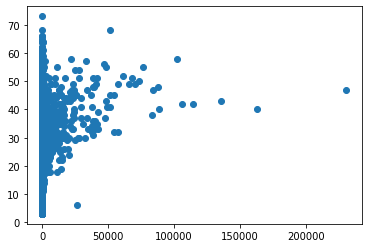

In [31]:
plt.scatter(x['Price Of Sculpture'], x['Height'])

In [11]:
df['Height'].isnull().sum()

375

In [12]:
df.pivot_table(values='Weight',index='Material',aggfunc='mean')

,Weight
Material,
Aluminium,1.351587e+03
Brass,2.789967e+04
Bronze,1.697773e+04
Clay,3.427542e+03
Marble,7.584780e+05
Stone,2.151031e+06
Wood,3.968911e+02


<AxesSubplot:ylabel='Frequency'>

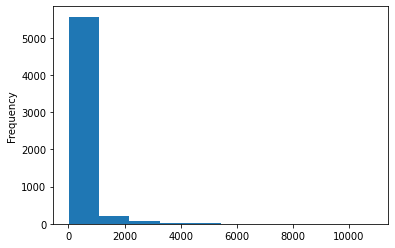

In [14]:
df['Weight'].apply(np.sqrt).plot.hist()

In [14]:
df['Weight_n']=df['Weight'].apply(np.sqrt)

In [22]:
df.pivot_table(values='Weight_n',index='Material',aggfunc='median')

,Weight_n
Material,
Aluminium,25.768197
Brass,89.810912
Bronze,77.346486
Clay,37.067506
Marble,339.698396
Stone,470.193577
Wood,15.842980


In [23]:
df.pivot_table(values='Width',index='Material',aggfunc='median')

,Width
Material,
Aluminium,8.0
Brass,8.0
Bronze,8.0
Clay,8.0
Marble,8.0
Stone,8.0
Wood,8.0


In [24]:
df.pivot_table(values='Height',index='Material',aggfunc='median')

,Height
Material,
Aluminium,21.0
Brass,20.0
Bronze,21.0
Clay,19.0
Marble,20.0
Stone,20.0
Wood,21.0


In [10]:
df.groupby('Transport').International.value_counts()

Transport  International
Airways    No                977
           Yes               840
Roadways   No               1954
           Yes               110
Waterways  Yes               809
           No                418
Name: International, dtype: int64

In [15]:
k={'Aluminium':25.7,'Brass':89.8,'Bronze':77.3,'Clay':37,'Marble':339.6,'Stone':470,'Wood':15.8}
def fill(x):
    if (pd.isnull(x['Weight_n'])==True) and (pd.isnull(x['Material'])==False):
     return k[x['Material']]
    else :
     return x['Weight_n']

In [16]:
df['Weight_n']=df.apply(lambda x: fill(x),axis=1)

In [46]:
df.isnull().sum()

Customer Id                0
Artist Name                0
Artist Reputation          0
Height                     0
Width                      0
Weight                   587
Material                   0
Price Of Sculpture         0
Base Shipping Price        0
International              0
Express Shipment           0
Installation Included      0
Transport                  0
Fragile                    0
Customer_Information       0
Remote_Location            0
Scheduled_Date             0
Delivery_Date              0
Customer Location          0
Cost                       0
Weight_n                   0
sch_date                   0
delv_mnth                  0
delv_date                  0
sch_dmnth                  0
dtype: int64

In [20]:
df['Weight_n'].fillna(value=df['Weight_n'].median(),inplace=True)

In [22]:
df=df.rename(columns={'Remote Location':'Remote_Location','Customer Information':'Customer_Information','Scheduled Date':'Scheduled_Date','Delivery Date':'Delivery_Date'})

In [23]:
df.groupby('Transport').Remote_Location.value_counts()

Transport  Remote_Location
Airways    No                 1301
           Yes                 330
Roadways   No                 1481
           Yes                 366
Waterways  No                  889
           Yes                 215
Name: Remote_Location, dtype: int64

In [25]:
df['sch_date']=df['Scheduled_Date'].dt.date

In [28]:
df['sch_dmnth']=df['Scheduled_Date'].dt.month

In [27]:
df['delv_date']=df['Delivery_Date'].dt.date

In [26]:
df['delv_mnth']=df['Delivery_Date'].dt.month

In [29]:
df['Artist Reputation'].fillna(value=df['Artist Reputation'].mean(),inplace=True)

In [30]:
df['Height'].fillna(value=df['Height'].mean(),inplace=True)

In [31]:
df['Width'].fillna(value=df['Width'].mean(),inplace=True)

In [34]:
def fill(x):
    if (pd.isnull(x['Transport'])==True and (x['International']=='No')):
     return 'Roadways'
    else :
     return x['Transport']

In [35]:
df['Transport']=df.apply(lambda x: fill(x),axis=1)

In [37]:
df['Transport'].fillna(value=df['Transport'].mode()[0],inplace=True)

In [39]:
df.pivot_table(values='Price Of Sculpture',index='Material',aggfunc='mean')

,Price Of Sculpture
Material,
Aluminium,6.815550
Brass,89.818064
Bronze,50.134507
Clay,11.949718
Marble,2457.232156
Stone,6349.181658
Wood,5.037598


In [40]:
def fill(x):
    if (pd.isnull(x['Material'])==True ):
        if(x['Price Of Sculpture']<=5):
            return 'Wood'
        if(x['Price Of Sculpture']>5 and x['Price Of Sculpture']<=8):
            return 'Aluminium'
        if(x['Price Of Sculpture']>8 and x['Price Of Sculpture']<=15):
            return 'Clay'
        if(x['Price Of Sculpture']>15 and x['Price Of Sculpture']<=65):
            return 'Bronze'
        if(x['Price Of Sculpture']>65 and x['Price Of Sculpture']<=150):
            return 'Brass'
        if(x['Price Of Sculpture']>150 and x['Price Of Sculpture']<=3000):
            return 'Marble'
        if(x['Price Of Sculpture']>3000 and x['Price Of Sculpture']<=8000):
            return 'Stone'
    else:
        return x['Material']
        
        

In [41]:
df['Material']=df.apply(lambda x: fill(x),axis=1)

In [43]:
df['Material'].fillna(value=df['Material'].mode()[0],inplace=True)

In [45]:
df['Remote_Location'].fillna(value=df['Remote_Location'].mode()[0],inplace=True)

In [47]:
df['state'] = df['Customer Location'].map(lambda x:x.split()[-2])

In [48]:
df.isnull().sum()

Customer Id                0
Artist Name                0
Artist Reputation          0
Height                     0
Width                      0
Weight                   587
Material                   0
Price Of Sculpture         0
Base Shipping Price        0
International              0
Express Shipment           0
Installation Included      0
Transport                  0
Fragile                    0
Customer_Information       0
Remote_Location            0
Scheduled_Date             0
Delivery_Date              0
Customer Location          0
Cost                       0
Weight_n                   0
sch_date                   0
delv_mnth                  0
delv_date                  0
sch_dmnth                  0
state                      0
dtype: int64

In [49]:
df['state'].value_counts()


AP    250
AA    245
AE    222
AZ    137
IL    135
GA    131
SC    130
MI    130
ID    130
AR    130
MD    127
VA    126
KS    126
NH    125
NC    124
WI    121
DE    120
MO    120
TN    120
NM    118
WV    118
MA    118
MN    117
TX    117
CT    117
CA    116
WA    116
MT    114
AL    113
FL    113
RI    111
IA    111
UT    110
OR    110
ND    110
NV    108
MS    108
LA    106
AK    106
WY    106
IN    106
SD    106
NJ    103
PA    102
DC    102
OK    100
CO     98
KY     98
NY     98
ME     97
HI     96
VT     96
NE     95
OH     91
Name: state, dtype: int64

In [51]:
df['schedul_Diff'] = (df['Delivery_Date'] - df['Scheduled_Date']).map(lambda x:str(x).split()[0])

In [53]:
df['schedul_Diff'] = pd.to_numeric(df['schedul_Diff'])

In [54]:
df=df.drop(['Customer Id','Artist Name','Weight','sch_date','sch_dmnth','Delivery_Date','Scheduled_Date','delv_mnth','delv_date','state'],axis=1)

In [58]:
df.head()

,Artist Reputation,Height,Width,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer_Information,Remote_Location,Cost,Weight_n,schedul_Diff
0,0.26,17.0,6.000000,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,-283.29,64.249514,-4
1,0.28,3.0,3.000000,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,-159.96,7.810250,-1
2,0.07,8.0,5.000000,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,-154.29,15.394804,-1
3,0.12,9.0,9.617647,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,-161.16,25.700000,-4
4,0.15,17.0,6.000000,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,-159.23,18.000000,-4


In [57]:
df=df.drop(['Customer Location'],axis=1)

In [59]:
df=pd.get_dummies(df,drop_first=True)

In [60]:
df.head()

,Artist Reputation,Height,Width,Price Of Sculpture,Base Shipping Price,Cost,Weight_n,schedul_Diff,Material_Brass,Material_Bronze,...,Material_Stone,Material_Wood,International_Yes,Express Shipment_Yes,Installation Included_Yes,Transport_Roadways,Transport_Waterways,Fragile_Yes,Customer_Information_Working Class,Remote_Location_Yes
0,0.26,17.0,6.000000,13.91,16.27,-283.29,64.249514,-4,1,0,...,0,0,1,1,0,0,0,0,1,0
1,0.28,3.0,3.000000,6.83,15.00,-159.96,7.810250,-1,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0.07,8.0,5.000000,4.96,21.18,-154.29,15.394804,-1,0,0,...,0,0,0,0,0,1,0,1,1,1
3,0.12,9.0,9.617647,5.81,16.31,-161.16,25.700000,-4,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0.15,17.0,6.000000,3.18,11.94,-159.23,18.000000,-4,0,0,...,0,0,1,1,1,0,0,0,1,0


In [61]:
x = df.drop('Cost',axis=1)
y = df['Cost']
x.shape, y.shape

((6500, 21), (6500,))

In [62]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y= train_test_split(x, y, test_size = 0.20,random_state = 42)

In [63]:
from sklearn.ensemble import ExtraTreesRegressor 
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [64]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [67]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [68]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [69]:
rf_random.fit(train_x,train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [70]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [71]:
rf_random.best_score_

-48328652480.91774

In [75]:
predictions=rf_random.predict(valid_x)

In [77]:
df.dtypes

Artist Reputation                     float64
Height                                float64
Width                                 float64
Price Of Sculpture                    float64
Base Shipping Price                   float64
Cost                                  float64
Weight_n                              float64
schedul_Diff                            int64
Material_Brass                          uint8
Material_Bronze                         uint8
Material_Clay                           uint8
Material_Marble                         uint8
Material_Stone                          uint8
Material_Wood                           uint8
International_Yes                       uint8
Express Shipment_Yes                    uint8
Installation Included_Yes               uint8
Transport_Roadways                      uint8
Transport_Waterways                     uint8
Fragile_Yes                             uint8
Customer_Information_Working Class      uint8
Remote_Location_Yes               

In [73]:
from sklearn import metrics

In [78]:
df.dropna(inplace=True)

In [91]:
print(max(0,100-np.sqrt(metrics.mean_squared_error(np.log(abs(valid_y)),np.log(abs(predictions))))))

99.4953079979068


In [ ]:
#test data

In [92]:
df_1=pd.read_csv('test.csv')
df_1.shape 

(3500, 19)

In [93]:
df_1['Scheduled Date']= pd.to_datetime(df_1['Scheduled Date'])

In [94]:
df_1['Delivery Date']= pd.to_datetime(df_1['Delivery Date'])

In [95]:
df_1['Weight_n']=df_1['Weight'].apply(np.sqrt)

In [96]:
df_1['Weight_n'].fillna(value=df_1['Weight_n'].median(),inplace=True)

In [97]:
df_1=df_1.rename(columns={'Remote Location':'Remote_Location','Customer Information':'Customer_Information','Scheduled Date':'Scheduled_Date','Delivery Date':'Delivery_Date'})

In [98]:
df_1['Artist Reputation'].fillna(value=df_1['Artist Reputation'].mean(),inplace=True)

In [99]:
df_1['Height'].fillna(value=df_1['Height'].mean(),inplace=True)

In [100]:
df_1['Width'].fillna(value=df_1['Width'].mean(),inplace=True)

In [101]:
def fill(x):
    if (pd.isnull(x['Material'])==True ):
        if(x['Price Of Sculpture']<=5):
            return 'Wood'
        if(x['Price Of Sculpture']>5 and x['Price Of Sculpture']<=8):
            return 'Aluminium'
        if(x['Price Of Sculpture']>8 and x['Price Of Sculpture']<=15):
            return 'Clay'
        if(x['Price Of Sculpture']>15 and x['Price Of Sculpture']<=65):
            return 'Bronze'
        if(x['Price Of Sculpture']>65 and x['Price Of Sculpture']<=150):
            return 'Brass'
        if(x['Price Of Sculpture']>150 and x['Price Of Sculpture']<=3000):
            return 'Marble'
        if(x['Price Of Sculpture']>3000 and x['Price Of Sculpture']<=8000):
            return 'Stone'
    else:
        return x['Material']

In [102]:
df_1['Material']=df_1.apply(lambda x: fill(x),axis=1)

In [103]:
df_1['Remote_Location'].fillna(value=df_1['Remote_Location'].mode()[0],inplace=True)

In [104]:
df_1['schedul_Diff'] = (df_1['Delivery_Date'] - df_1['Scheduled_Date']).map(lambda x:str(x).split()[0])

In [105]:
df_1['schedul_Diff'] = pd.to_numeric(df_1['schedul_Diff'])

In [106]:
df_1=df_1.drop(['Customer Id','Artist Name','Weight','Delivery_Date','Scheduled_Date','Customer Location'],axis=1)

In [107]:
df_1=pd.get_dummies(df_1,drop_first=True)

In [109]:
pred=rf_random.predict(df_1)

In [110]:
pred=pd.DataFrame(pred)

In [117]:
submit2= pd.DataFrame()

In [113]:
df_test=pd.read_csv('test.csv')

In [114]:
id= df_test['Customer Id']

In [115]:
id=pd.DataFrame(id)

In [140]:
submit2['Customer Id']=id['Customer Id']

In [141]:
submit2['Cost']=abs(pred[0])

In [142]:
submit2.to_csv("C:\\Users\\PRACHI\\Desktop\\Submission2.csv")

In [135]:
submit1.shape

(3500, 2)

In [136]:
df_1.shape

(3500, 21)